# Wiener-Khintchine theorem

An operation which appears frequently in physics is the ___convolution___. For instance, the image of an astronomical object observed with a telescope, is the convolution of the light from the object itself and the repsonse of the optical systems of the telescope to this light, which is also known as point spread function of the telescope. 

One special case of a convolution is the auto-correlation function, i.e. 

$$c_{\rm ff}(\tau) = \int_{-\infty}^\infty f(t+\tau)f^*(t)dt $$

which is simply the convolution of $$f(\tau)\otimes f^*(\tau).$$

As we have seen in the lecture we can show that the Fourier transform of the auto-correlation is equal to the power spectrum, i.e.  

$$\boxed{\mathcal{F} \{c_{\rm ff}(\tau)\} = |F(\omega)|^2}$$

This relation is known as the ___Wiener-Khintchine theorem___, named after the American mathematician Norbert Wiener and Russian mathematician Aleksandr Khintchine who proved this theorem in the 1930s. It implies that the auto-correlation function and the power spectrum are Fourier pairs. While the former represents an anlaysis method in the time-domain, the latter represents the same analysis in the frequency-domain. The theorem is particularly useful to reveal the existence of periodicities in a function or spectrum. 

## Let's look at an example. 

There are numerous examples where the Wiener-Khintchine theorem can be applied, some of which we've seen in the lecture. It is for instance wildly used in the analysis of time series and signal processing. The theorem can be applied for analyzing the _temporal_ coherence of spectra, as well as for understanding _spatially_ coherent structures. 

We will now look at an example. To this end we will first create a mock signal, which could for instance be the observed changes in the radial velocity of a star in the presence of multiple exoplanets orbiting it. Hence we model the expected signal as a superposition of different sinusoidal functions. 

In [64]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlation_lags
import numpy as np

matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
np.random.seed(42)

In [65]:
def mock_data(t, frequencies=[0.1, 1, 10], amplitudes=None):
    amplitudes = np.ones(len(frequencies)) if amplitudes is None else amplitudes
    assert len(frequencies) == len(amplitudes)
    return np.sum([a*np.sin(2.*np.pi*t*f) for f, a in zip(frequencies, amplitudes)], axis=0)

In [66]:
N = 100000          # number of data points
dt = 1. / 1000.     # sampling rate 

# let's create a signal that we would expect to observe for three planets with different oribital periods
frequencies = [0.1, 1., 10.]
amplitudes = [0.25, 0.5, 1.]
t = np.linspace(0, N*dt, N)
f = mock_data(t, frequencies=frequencies, amplitudes=amplitudes)

# adding some noise to the signal
noise = 0.1
f += noise * np.random.randn(t.size)

Let's take a look at the mocked up signal:

Text(0, 0.5, 'radial velocity')

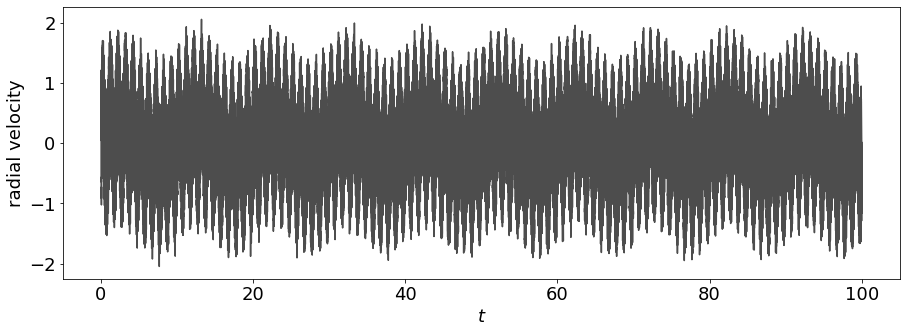

In [67]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(t, f, c = '0.3')
ax.set_xlabel(r'$t$', fontsize = 18)
ax.set_ylabel(r'radial velocity', fontsize = 18)

### We will now calculate the two terms of the Wiener-Khintchine theorem. 

1. we start with the left hand side of the theorem, i.e. we calculate the Fourier transform of the auto-correlation function of our signal. 

In [68]:
# auto-correlation of the signal
c_ff = correlate(f, f, mode='full')
c_ff /= N                             # normalization
tau = correlation_lags(len(f), len(f), mode='full')

Text(0, 0.5, 'auto-correlation $c_{\\rm ff}$')

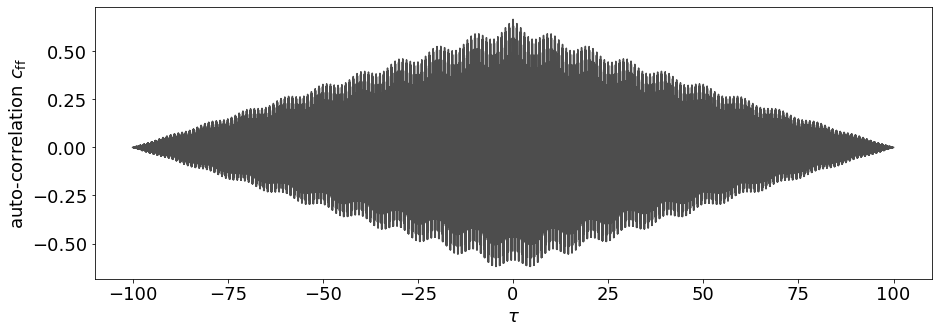

In [69]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(tau*dt, c_ff, c = '0.3')
ax.set_xlabel(r'$\tau$', fontsize = 18)
ax.set_ylabel(r'auto-correlation $c_{\rm ff}$', fontsize = 18)

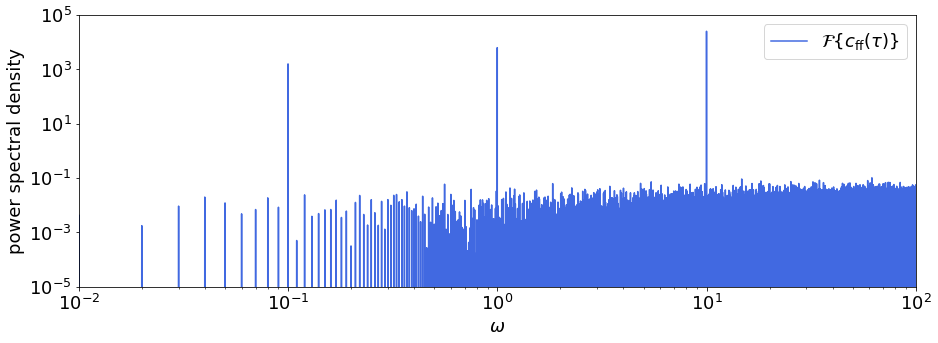

In [70]:
# Fourier transform of the auto-correlation function
fft_cff = np.fft.fft(c_ff[:-1])
freq_cff = np.fft.fftfreq(c_ff[:-1].size, dt)

fig, ax = plt.subplots(figsize = (15, 5))
ax.loglog(freq_cff[:N//2], fft_cff.real[:N//2], c = 'royalblue', label = r'$\mathcal{F}\{c_{\rm ff}(\tau)\}$')
ax.set_ylim(1e-5, 1e5)
ax.set_xlim(1e-2, 1e2)
ax.set_xlabel(r'$\omega$', fontsize = 18)
ax.set_ylabel(r'power spectral density', fontsize = 18)
ax.legend(frameon = True, fontsize = 18)

2. Now let's look at the right hand side of the Wiener-Khintchine theorem. 

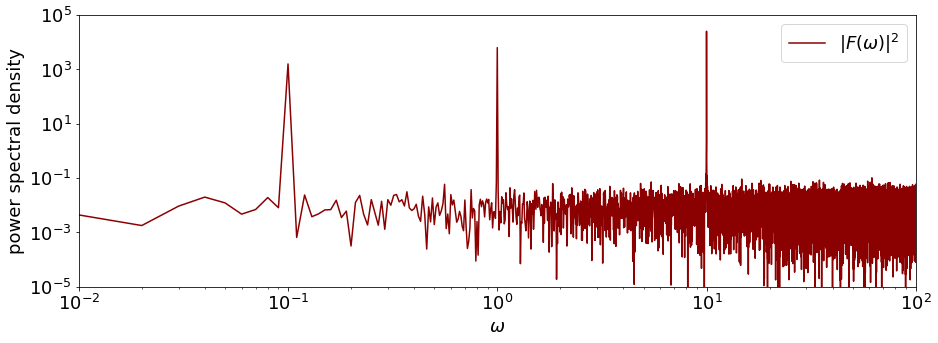

In [71]:
psd = np.fft.fft(f) * np.conj(np.fft.fft(f)) / N      # division by N is just for the normalization.    
freq = np.fft.fftfreq(f.size, dt)

fig, ax = plt.subplots(figsize = (15, 5))
ax.loglog(freq[:N//2], psd.real[:N//2], c = 'darkred', label = r'$|F(\omega)|^2$')
ax.set_xlim(1e-2, 1e2)
ax.set_ylim(1e-5, 1e5)
ax.set_xlabel(r'$\omega$', fontsize = 18)
ax.set_ylabel(r'power spectral density', fontsize = 18)
ax.legend(frameon = True, fontsize = 18)

Let's put it all together:

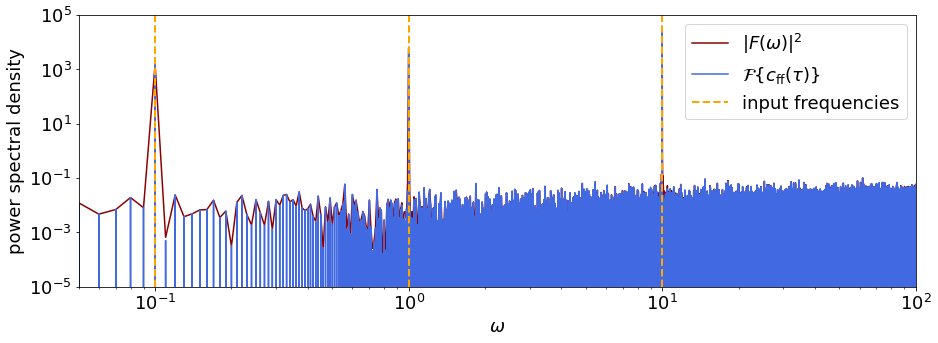

In [72]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.loglog(freq[:N//2], psd.real[:N//2], c = 'darkred', label = r'$|F(\omega)|^2$')
ax.loglog(freq_cff[:N//2], fft_cff.real[:N//2], c = 'royalblue', label = r'$\mathcal{F}\{c_{\rm ff}(\tau)\}$')
ax.set_xlim(5e-2, 1e2)
ax.set_ylim(1e-5, 1e5)
ax.set_xlabel(r'$\omega$', fontsize = 18)
ax.set_ylabel(r'power spectral density', fontsize = 18)
# plot input frequencies
ax.axvline(frequencies[0], linestyle = '--', color = 'orange', lw = 2, label = 'input frequencies')
[ax.axvline(f, linestyle = '--', color = 'orange', lw = 2) for f in frequencies[1:]]
ax.legend(frameon = True, fontsize = 18)